In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)
from scipy.stats import norm
import numpy as np

In [43]:
df = pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\Data Analysts\Week 1\Outlier Removal Exercise\bhp.csv")
# df.price.describe()
# df.info()
# df.shape
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [46]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Removing outliers using percentile technique**

In [44]:
price_low_percentile  = df.price_per_sqft.quantile(0.001)
price_low_percentile

np.float64(1366.184)

In [47]:
price_high_percentile = df.price_per_sqft.quantile(0.999)
price_high_percentile

np.float64(50959.36200000098)

We can also perform this in single line as shown below:


**lower_limit,upper_limit = df.price_per_sqft.quantile([0.001,0.999])**

In [58]:
df_no_outliers =  df[(df.price_per_sqft > price_low_percentile) & (df.price_per_sqft < price_high_percentile)]
# df_no_outliers
df_no_outliers.shape

(13172, 7)

In [59]:
df.shape

(13200, 7)

In [60]:
df.shape[0]-df_no_outliers.shape[0]

28

Thus 28 outliers of the property details where removed successfully using percentile technique

**Removing outliers using 4 Standard Deviation**    

In [ ]:
upper_limit = df_no_outliers.price_per_sqft.mean() + 4 * df_no_outliers.price_per_sqft.std()
upper_limit
lower_limit = df_no_outliers.price_per_sqft.mean() - 4 * df_no_outliers.price_per_sqft.std()
lower_limit

np.float64(-9900.429065502582)

In [64]:
upper_limit,lower_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [110]:
new_dataframe = df_no_outliers [( df_no_outliers.price_per_sqft < upper_limit ) & (df_no_outliers.price_per_sqft > lower_limit)]
new_dataframe.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9767,Koramangala,3 BHK,1745.0,3.0,98.00,3,5616,-0.252994
9822,Uttarahalli,3 BHK,1270.0,2.0,55.25,3,4350,-0.558716
427,Yelenahalli,2 BHK,1240.0,2.0,47.12,2,3800,-0.691533
8005,Hebbal,2 BHK,1345.0,2.0,97.00,2,7211,0.132177
6628,NGR Layout,1 BHK,907.0,1.0,38.00,1,4189,-0.597595
3857,HBR Layout,2 BHK,1200.0,2.0,60.00,2,5000,-0.401750
4421,Kaval Byrasandra,2 BHK,1185.0,2.0,49.00,2,4135,-0.610635
2851,Tindlu,7 Bedroom,7500.0,7.0,400.00,7,5333,-0.321335
8493,Kanakpura Road,3 BHK,1700.0,3.0,120.00,3,7058,0.095229
817,Kanakpura Road,1 BHK,525.0,1.0,30.00,1,5714,-0.229328


In [111]:
new_dataframe.shape,df_no_outliers.shape

((13047, 8), (13172, 8))

In [112]:
df_no_outliers.shape[0] - new_dataframe.shape[0]

125

Now, we have removed total of 125 outliers successfully!!! using standard deviation technique

I have visualised histogram using seaborn library

<Axes: xlabel='price_per_sqft', ylabel='Count'>

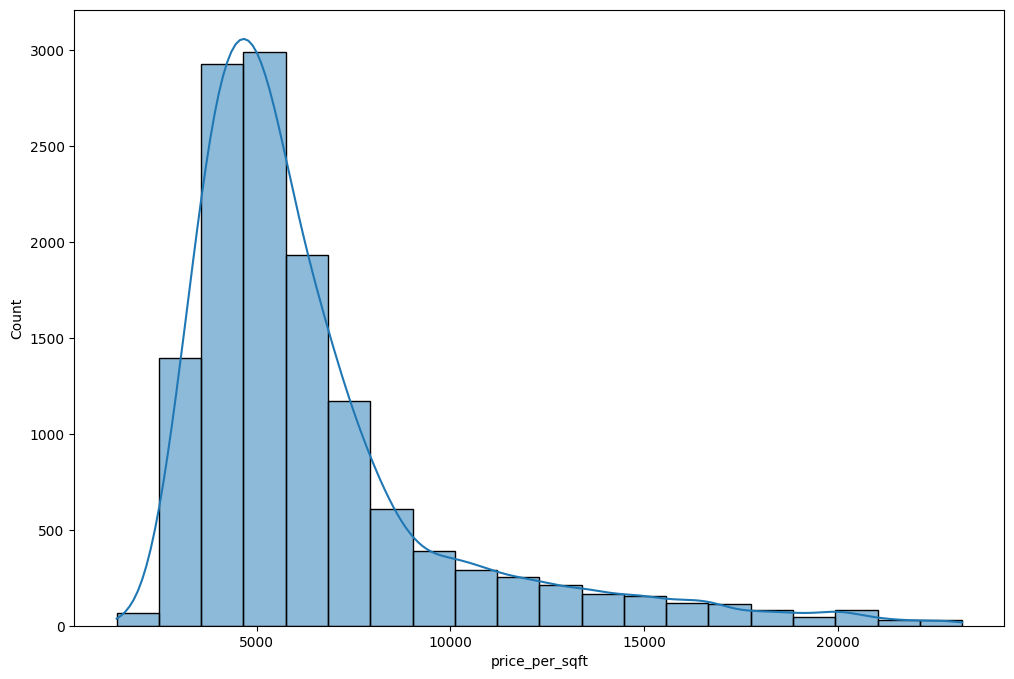

In [83]:
sn.histplot(new_dataframe.price_per_sqft, bins = 20,kde=True)

Text(0, 0.5, 'Count')

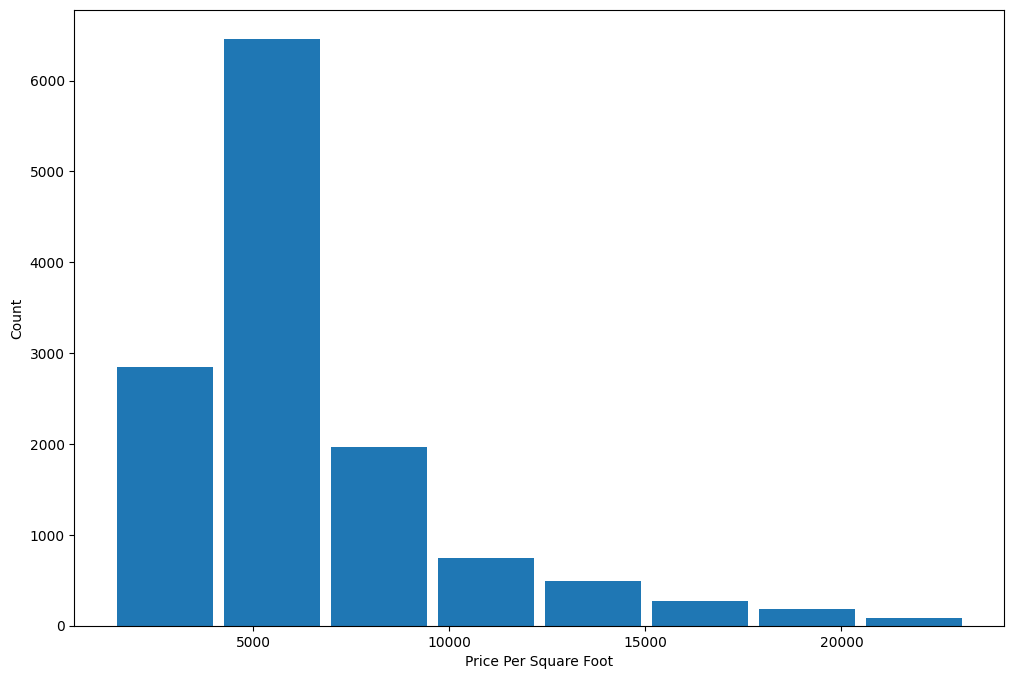

In [93]:
plt.hist(new_dataframe.price_per_sqft, bins = 8, rwidth = 0.9)
plt.xlabel("Price Per Square Foot")
plt.ylabel("Count")

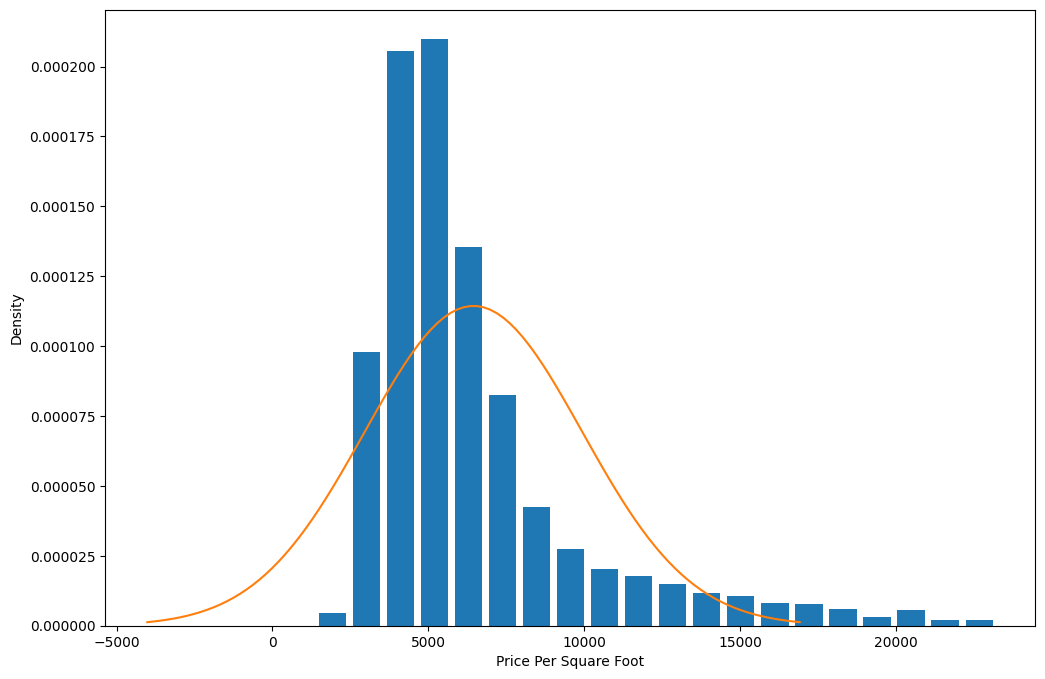

In [104]:
plt.hist(new_dataframe.price_per_sqft, bins = 20, rwidth = 0.8, density = True)
plt.xlabel("Price Per Square Foot")
plt.ylabel("Density")
x_values = np.linspace(new_dataframe.price_per_sqft.mean()-3*new_dataframe.price_per_sqft.std(), new_dataframe.price_per_sqft.mean()+3*new_dataframe.price_per_sqft.std(), 100)
y_values = norm.pdf(x_values,new_dataframe.price_per_sqft.mean(),new_dataframe.price_per_sqft.std())
plt.plot(x_values,y_values)

In [113]:
df_no_outliers['zscore'] = (df_no_outliers.price_per_sqft - df_no_outliers.price_per_sqft.mean()) / df_no_outliers.price_per_sqft.std()
df_no_outliers.sample(10)

C:\Users\nithi\AppData\Local\Temp\ipykernel_42708\1202338553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['zscore'] = (df_no_outliers.price_per_sqft - df_no_outliers.price_per_sqft.mean()) / df_no_outliers.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4116,other,3 BHK,1155.0,2.0,60.00,3,5194,-0.354901
8420,other,3 BHK,1365.0,3.0,54.00,3,3956,-0.653861
11790,Domlur,3 BHK,1850.0,3.0,180.00,3,9729,0.740239
8945,Marsur,3 BHK,720.0,2.0,32.00,3,4444,-0.536016
11327,Whitefield,2 BHK,1190.0,2.0,70.00,2,5882,-0.188759
12740,Vidyaranyapura,2 BHK,1200.0,2.0,42.00,2,3500,-0.763979
1746,Banashankari Stage II,4 Bedroom,1200.0,2.0,150.00,4,12500,1.409398
11783,Hebbal,2 BHK,1420.0,2.0,99.26,2,6990,0.078808
8915,Kengeri,2 BHK,1052.0,2.0,51.00,2,4847,-0.438697
6599,Hoodi,3 BHK,1490.0,3.0,79.00,3,5302,-0.328821


In [120]:
zscore_outlier = df_no_outliers[(df_no_outliers.zscore < -4) | (df_no_outliers.zscore > 4) ]
zscore_outlier.shape

(125, 8)

In [122]:
final_no_outlier = df_no_outliers.drop(zscore_outlier.index)

In [126]:
final_no_outlier.shape

(13047, 8)